## Data Analysis on MAANG companies stock data

Visualizations using **Seaborn**

Preprocessed data: data/processed/maang_combined.csv

original data by SOUMENDRA PRASAD MOHANTY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os

In [41]:
# import data
data = pd.read_csv('data/processed/maang_combined.csv')
data.head(3)

,Open,High,Low,Close,Adj Close,Volume,Date,Company
0,58.687500,59.312500,56.000000,58.281250,36.361576,53228400,2000-01-03,Microsoft
1,0.936384,1.004464,0.907924,0.999442,0.850643,535796800,2000-01-03,Apple
2,4.075000,4.478125,3.952344,4.468750,4.468750,322352000,2000-01-03,Amazon


In [42]:
# set Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [43]:
# example of separated dataframe
aapl_df = data[data["Company"] == "Apple"]
aapl_df.head(3)

,Open,High,Low,Close,Adj Close,Volume,Date,Company
1,0.936384,1.004464,0.907924,0.999442,0.850643,535796800,2000-01-03,Apple
5,0.966518,0.987723,0.903460,0.915179,0.778926,512377600,2000-01-04,Apple
6,0.926339,0.987165,0.919643,0.928571,0.790324,778321600,2000-01-05,Apple


In [44]:
# check for missing values
data.isna().any().any()

np.False_

### Closing prices

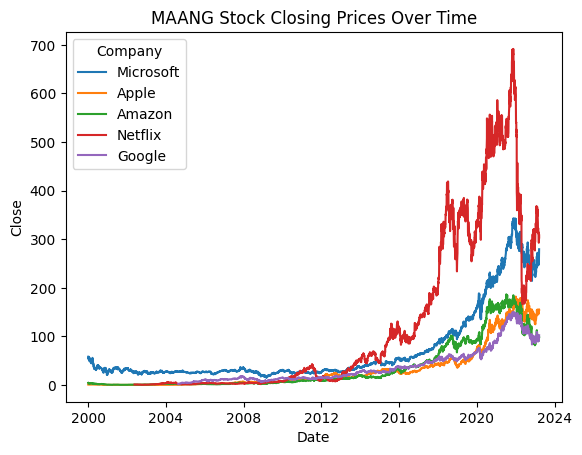

In [45]:
# simple line plot (Close)
sns.lineplot(data=data, x="Date", y="Close", hue="Company")
plt.title("MAANG Stock Closing Prices Over Time")
plt.show()

In [46]:
# company stock close price correlation matrix
pivoted_data = data.pivot(index="Date", columns="Company", values="Close")
pivoted_data.corr()

Company,Amazon,Apple,Google,Microsoft,Netflix
Company,,,,,
Amazon,1.000000,0.939152,0.955467,0.956184,0.970675
Apple,0.939152,1.000000,0.971538,0.981584,0.860492
Google,0.955467,0.971538,1.000000,0.979167,0.900185
Microsoft,0.956184,0.981584,0.979167,1.000000,0.897867
Netflix,0.970675,0.860492,0.900185,0.897867,1.000000


In [47]:
# average closing price per company
data.groupby("Company")["Close"].mean()

Company
Amazon        34.853440
Apple         30.982545
Google        38.265822
Microsoft     70.482805
Netflix      122.090193
Name: Close, dtype: float64

### Volume

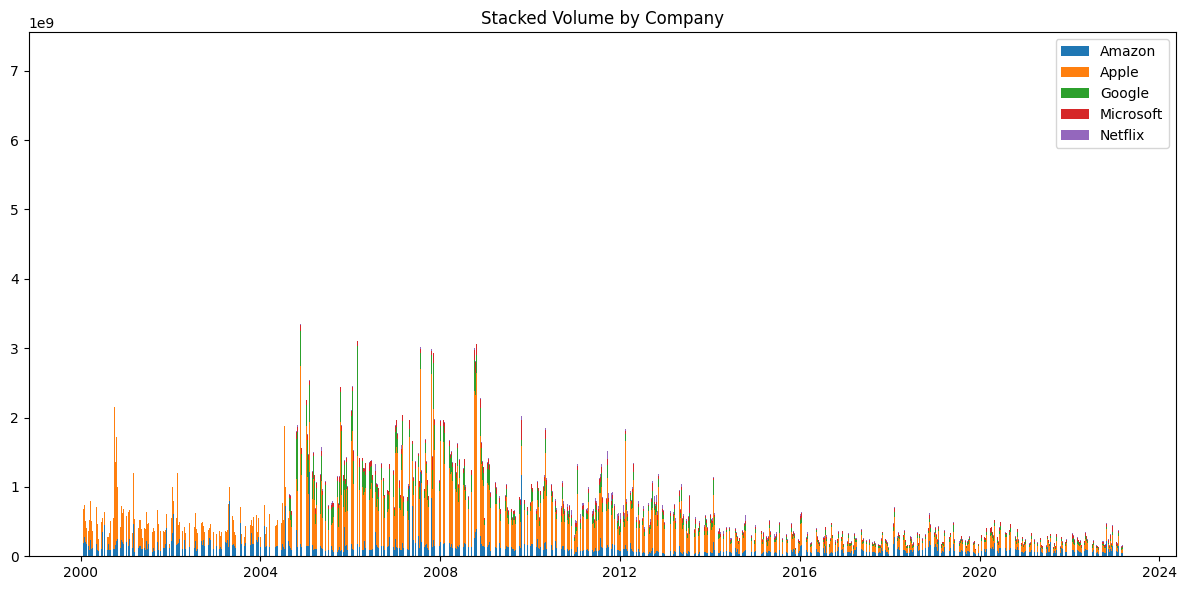

In [50]:
# matplotlib stacked barchart combined with seaborn styling
# barchart, last 1000 data points

# pivot so each company becomes its own column
df_pivot = data.pivot_table(
    index="Date",
    columns="Company",
    values="Volume",
    aggfunc="sum"
)

# choose seaborn palette
palette = sns.color_palette("tab10", len(df_pivot.columns))

plt.figure(figsize=(12, 6))

bottom = None

for (company, color) in zip(df_pivot.columns, palette):
    plt.bar(
        df_pivot.index,
        df_pivot[company],
        bottom=bottom,
        label=company,
        color=color
    )
    # update bottom for stacking
    bottom = (
        df_pivot[company] if bottom is None
        else bottom + df_pivot[company]
    )

plt.title("Stacked Volume by Company")
plt.legend()
plt.tight_layout()
plt.show()